<a href="https://colab.research.google.com/github/salim4n/kaggle_competition/blob/main/Tf_Boston_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
data = data
target = target

X = data
Y = target.reshape((506, 1))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [19]:
model = Sequential([Dense(units=13, activation='sigmoid'),
                    Dense(units=8, activation='sigmoid'),
                    Dense(units=5, activation='sigmoid'),
                    Dense(units=1)
                    ])

model.compile(loss="mse",optimizer=SGD(learning_rate=0.001))
h = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test))

Epoch 1/500
12/12 [==============================] - 1s 14ms/step - loss: 568.3067 - val_loss: 522.2194
Epoch 2/500
12/12 [==============================] - 0s 4ms/step - loss: 513.7930 - val_loss: 467.5239
Epoch 3/500
12/12 [==============================] - 0s 4ms/step - loss: 457.0591 - val_loss: 410.5306
Epoch 4/500
12/12 [==============================] - 0s 5ms/step - loss: 399.3129 - val_loss: 354.6924
Epoch 5/500
12/12 [==============================] - 0s 3ms/step - loss: 344.8065 - val_loss: 304.4841
Epoch 6/500
12/12 [==============================] - 0s 5ms/step - loss: 297.0103 - val_loss: 261.6436
Epoch 7/500
12/12 [==============================] - 0s 5ms/step - loss: 256.6630 - val_loss: 226.2749
Epoch 8/500
12/12 [==============================] - 0s 5ms/step - loss: 223.3746 - val_loss: 197.0397
Epoch 9/500
12/12 [==============================] - 0s 4ms/step - loss: 195.8681 - val_loss: 173.0776
Epoch 10/500
12/12 [==============================] - 0s 4ms/step - loss

In [20]:
import matplotlib.pyplot as plt

def plot_learning_curve(history):
  plt.plot(list(range(len(history['loss']))), history['loss'])
  plt.plot(list(range(len(history['val_loss']))), history['val_loss'])
  plt.xlabel('Epochs')
  plt.ylabel("Loss")
  plt.title("Learning Curve")
  plt.show()

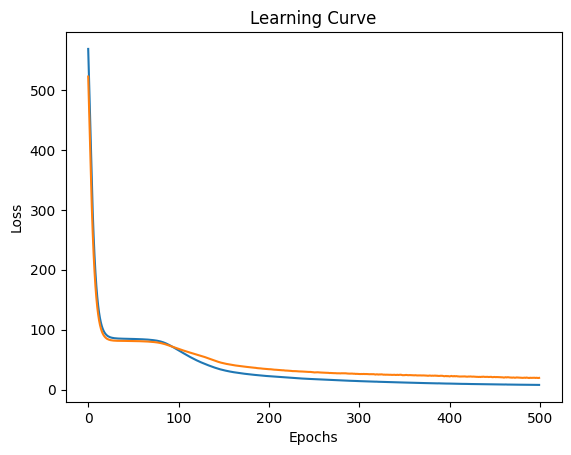

In [21]:
plot_learning_curve(h.history)

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 13)                182       
                                                                 
 dense_13 (Dense)            (None, 8)                 112       
                                                                 
 dense_14 (Dense)            (None, 5)                 45        
                                                                 
 dense_15 (Dense)            (None, 1)                 6         
                                                                 
Total params: 345
Trainable params: 345
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.save('model.h5')

In [24]:
from tensorflow.keras.models import load_model

In [25]:
new_model = load_model('model.h5')
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 13)                182       
                                                                 
 dense_13 (Dense)            (None, 8)                 112       
                                                                 
 dense_14 (Dense)            (None, 5)                 45        
                                                                 
 dense_15 (Dense)            (None, 1)                 6         
                                                                 
Total params: 345
Trainable params: 345
Non-trainable params: 0
_________________________________________________________________


In [26]:
P = new_model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [27]:
P

array([[22.519562 ],
       [25.180302 ],
       [24.85315  ],
       [11.738683 ],
       [19.462189 ],
       [19.51661  ],
       [22.932804 ],
       [21.212765 ],
       [21.857704 ],
       [16.621002 ],
       [10.813156 ],
       [12.486655 ],
       [14.801397 ],
       [11.320531 ],
       [43.070827 ],
       [35.641117 ],
       [23.71316  ],
       [38.77682  ],
       [29.89711  ],
       [22.891361 ],
       [23.618183 ],
       [20.942204 ],
       [18.86805  ],
       [26.880821 ],
       [23.20298  ],
       [16.334835 ],
       [17.128117 ],
       [15.979302 ],
       [42.945282 ],
       [18.399754 ],
       [14.471624 ],
       [16.73147  ],
       [19.050259 ],
       [20.60813  ],
       [26.151512 ],
       [19.080212 ],
       [11.218561 ],
       [30.851402 ],
       [14.110193 ],
       [12.791972 ],
       [25.011906 ],
       [22.4925   ],
       [20.157448 ],
       [14.9247675],
       [20.491041 ],
       [22.986774 ],
       [20.44482  ],
       [16.31

In [28]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 19.7395


19.739484786987305